In [1]:
import pandas as pd
import numpy as np
import os 
import glob
import csv
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from scipy import stats



In [2]:
## Data preprocessing

def preprocess(path):
    df = pd.read_csv(path, skiprows = 6, delimiter = "\t")

    #Main function that calls all other functions
    strain = df["Mises(ln(V))"]
    stress = df["Mises(Cauchy)"]
    true_stress, true_strain, true_plastic_strain = getTruePlasticStrain(strain,stress)
    elasticStress, elasticStrain, elasticTrueStrain, trimmedStress, trimmedStrain, trimmedTrueStrain = elastic(true_stress, true_strain, true_plastic_strain)
    
    plot(elasticStress, elasticStrain, trimmedStress, trimmedStrain, trimmedTrueStrain)
    print("R-squared = " + str(adjR(elasticStrain, elasticStress, 1)))
    
    data = {
       "Trimmed Stress" : trimmedStress,
        "Trimmed Strain" : trimmedTrueStrain
    }
    newdf = pd.DataFrame(data)
    newdf.to_csv(path + ".csv", index=False)
    return elasticStress, elasticStrain, elasticTrueStrain, trimmedStress, trimmedStrain, trimmedTrueStrain


def getTruePlasticStrain(strain, stress):
    data = {
       "Mises(Cauchy)" : stress,
        "Mises(ln(V))" : strain
    }
    newdf = pd.DataFrame(data)
   
    # Getting the slope
    slope = (newdf["Mises(Cauchy)"][1] - newdf["Mises(Cauchy)"][0]) / (newdf["Mises(ln(V))"][1] - newdf["Mises(ln(V))"][0])
    newdf['True_plastic_strain'] = newdf["Mises(ln(V))"] - newdf["Mises(Cauchy)"] / slope
    
    true_stress = newdf["Mises(Cauchy)"]
    true_strain = newdf["Mises(ln(V))"]
    true_plastic_strain = newdf["True_plastic_strain"]
    
    return true_stress, true_strain, true_plastic_strain

def elastic(stress, strain, trueStrain):
    
    # Obtain the elastic stress and strain based on r-squared
    
    trimValue = np.arange(0.001, 0.02, 0.00001)
    trimValue = np.flip(trimValue)
    r2 = 0.00
    elasticTrueStrain = trueStrain
    elasticStrain = strain
    elasticStress = stress
    while(r2 <= 0.95):
        for x in trimValue:
            val = np.argmax(strain >= x)
            elasticTrueStrain = trueStrain[0:val]
            elasticStrain = strain[0:val]
            elasticStress = stress[0:val]
            r2 = adjR(elasticStrain, elasticStress, 1)
            
    trimmedTrueStrain = trueStrain
    
    trimmedStrain = strain
    trimmedStress = stress
    ##.drop(range(1, val))
    # Obtain the elastic stress and strain
    

    return elasticStress, elasticStrain, elasticTrueStrain, trimmedStress, trimmedStrain, trimmedTrueStrain

def plot(elasticStress, elasticStrain, trimmedStress, trimmedStrain, trimmedTrueStrain):
    
    plt.plot(trimmedStrain, trimmedStress, 'g', label = "SingleCrystalTest")
    plt.plot(trimmedTrueStrain, trimmedStress, 'b', label = "FlowCurve")
    plt.plot(elasticStrain, elasticStress, 'r', label = "Elastic")
    leg = plt.legend(loc = "upper right")
    plt.xlabel(xlabel = "Strain (mm)")
    plt.ylabel(ylabel = "Stress (MPa)")
    plt.xlim([0, 0.005])
    plt.figure(figsize = (6,6))
    plt.show()


def adjR(x, y, degree):
    results = []
    coeffs = np.polyfit(x, y, degree)
    p = np.poly1d(coeffs)
    yhat = p(x)
    ybar = np.sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)
    sstot = np.sum((y - ybar)**2)
    results = 1- (((1-(ssreg/sstot))*(len(y)-1))/(len(y)-degree-1))

    return results

def print_output(directory):
    os.chdir(directory)
    filenames = [i for i in glob.glob("*.txt")]
    vr = {}
    for i in filenames:
        vr[i] = preprocess(i)
        data = {
           "Trimmed Stress" : vr[i][3],
            "Trimmed Strain" : vr[i][5]
        }
    newdf = pd.DataFrame(data)
    newdf.to_csv(i + ".csv", index=False) 
    


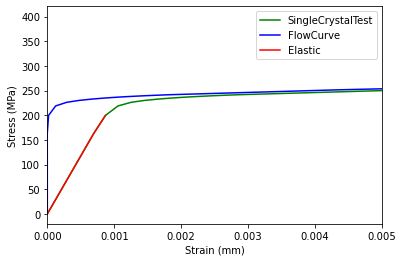

<Figure size 432x432 with 0 Axes>

R-squared = 0.9995460424322485


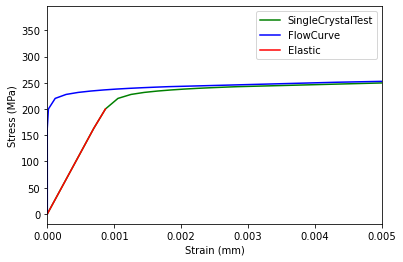

<Figure size 432x432 with 0 Axes>

R-squared = 0.999652378635257


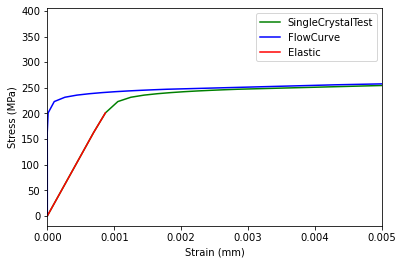

<Figure size 432x432 with 0 Axes>

R-squared = 0.9998045871520373


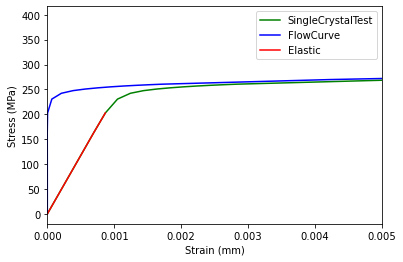

<Figure size 432x432 with 0 Axes>

R-squared = 0.9999721088432669


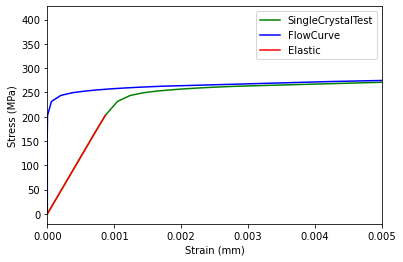

<Figure size 432x432 with 0 Axes>

R-squared = 0.9999802728333993


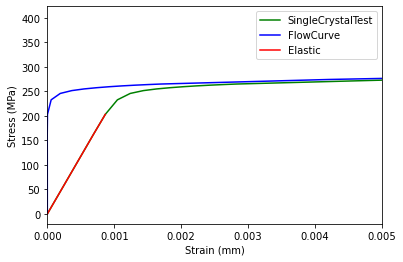

<Figure size 432x432 with 0 Axes>

R-squared = 0.9999861258430432


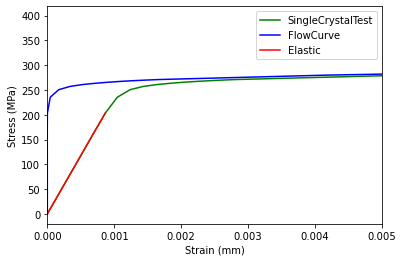

<Figure size 432x432 with 0 Axes>

R-squared = 0.999995582226341


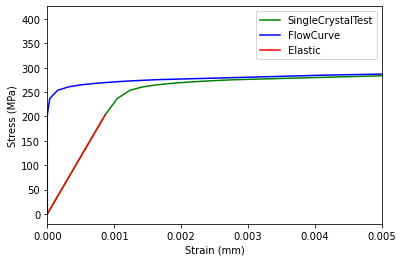

<Figure size 432x432 with 0 Axes>

R-squared = 0.9999981998758268


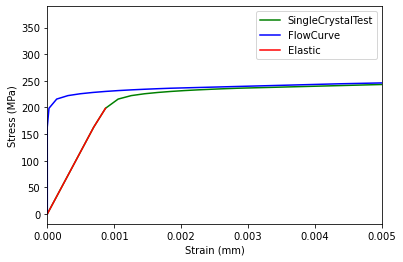

<Figure size 432x432 with 0 Axes>

R-squared = 0.9992427764174443


In [3]:
os.chdir(r"/notebooks/CompEng Project/Untitled Folder")
filenames = [i for i in glob.glob("*.txt")]
vr = {}
for i in filenames:
    vr[i] = preprocess(i)
    data = {
       "Trimmed Stress" : vr[i][3],
        "Trimmed Strain" : vr[i][5]
    }
    newdf = pd.DataFrame(data)
    newdf.to_csv(i + ".csv", index=False) 

NameError: name 'trimmedStrain' is not defined